# Chapter 6: The Discrete Wavelet Packet Transform

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append("../src")
import DWPT, MODWT
from MODWPT import get_Dj, get_MODWPT

## 6.7 Example: MODWPT of Solar Physics Data

In [3]:
def test1():
    """
    Reproduce plot of Figure 235 from WMTSA

    Input:
        None
    Output:
        None
    """
    X = np.loadtxt('../data/magS4096.dat')
    N = np.shape(X)[0]
    W = get_MODWPT(X, 'LA8', 4)
    W4 = W[4]
    nu = DWPT.get_nu('LA8', 4)
    L = 8
    Lj = (2 ** 4 - 1) * (L - 1) + 1
    dt = 1.0 / 24.0
    plt.figure(1, figsize=(15, 51))
    # Plot data
    plt.subplot2grid((17, 1), (16, 0))
    plt.plot(dt * np.arange(0, N), X, 'k', label='X')
    plt.xlim([0, dt * (N - 1)])
    plt.xlabel('t (days)')
    plt.legend(loc=1)
    # Plot 16 MODWPT vectors of coefficients at level 4
    for n in range(0, 16):
        W4n = W4[n]
        plt.subplot2grid((17, 1), (n, 0))
        tshift = np.zeros(N)
        for t in range(0, N):
            tshift[t] = dt * ((t - abs(nu[3][n])) % N)
        torder = np.argsort(tshift)
        plt.plot(tshift[torder], W4n[torder], 'k', label='T' + str(nu[3][n]) + 'W4,' + str(n))
        plt.axvline(dt * (Lj - 2 - abs(nu[3][n])), linewidth=1, color='red')
        plt.axvline(dt * (N - abs(nu[3][n])), linewidth=1, color='red')
        plt.xlim([0, dt * (N - 1)])
        plt.legend(loc=1)
    plt.savefig('../figures/MODWPT/magS4096_W4.eps', format='eps')
    plt.show()

Compute LA8 MODWPT of the solar physics time series from WMTSA.

Reproduce Figure 235 in WMTSA.

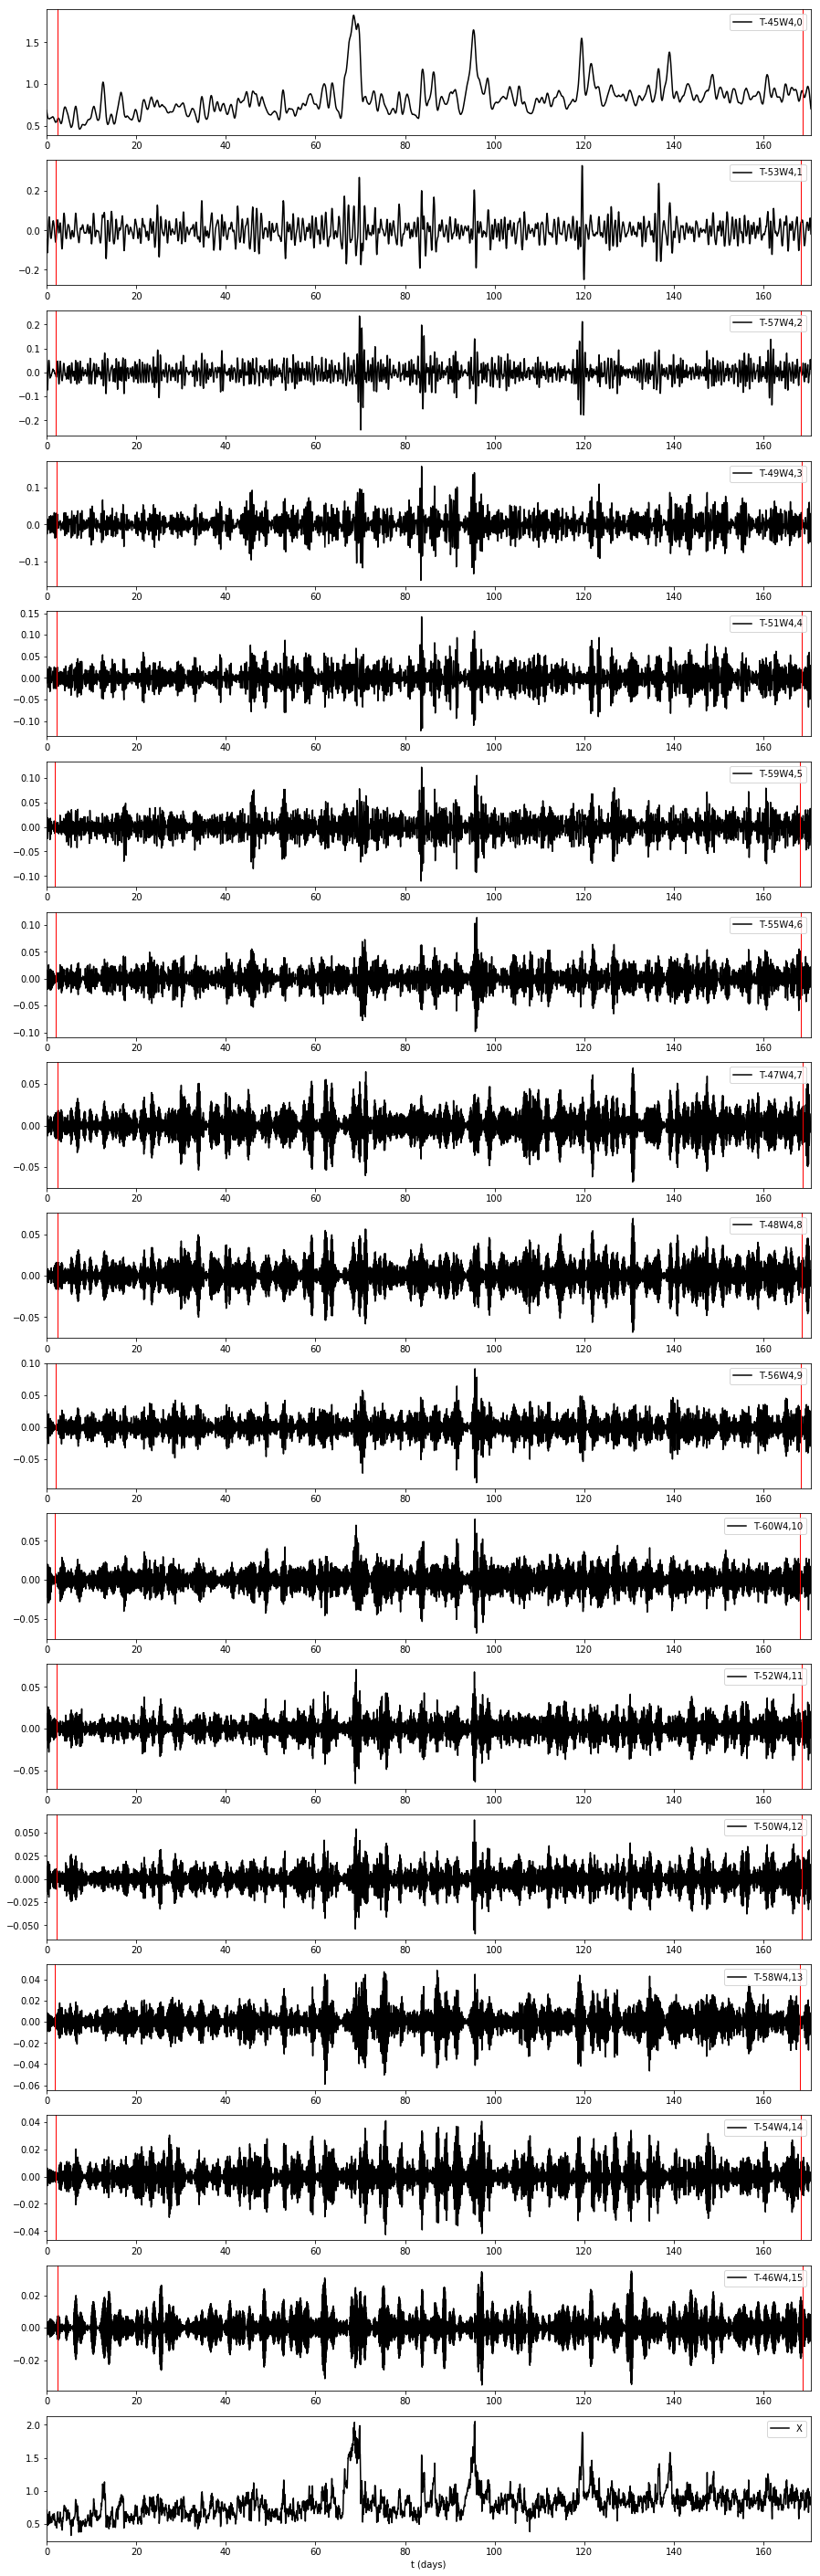

In [4]:
test1()

In [5]:
def test2():
    """
    Reproduce plot of Figure 238 from WMTSA

    Input:
        None
    Output:
        None
    """
    X = np.loadtxt('../data/magS4096.dat')
    N = np.shape(X)[0]
    W = get_MODWPT(X, 'LA8', 4)
    W4 = W[4]
    D4 = get_Dj(W4, 'LA8', 4)
    L = 8
    L4 = (2 ** 4 - 1) * (L - 1) + 1
    dt = 1.0 / 24.0
    plt.figure(1, figsize=(15, 51))
    # Plot data
    plt.subplot2grid((17, 1), (16, 0))
    plt.plot(dt * np.arange(0, N), X, 'k', label='X')
    plt.xlim([0, dt * (N - 1)])
    plt.xlabel('t (days)')
    plt.legend(loc=1)
    # Plot 16 MODWPT vectors of coefficients at level 4
    for n in range(0, 16):
        D4n = D4[n]
        plt.subplot2grid((17, 1), (n, 0))
        plt.plot(dt * np.arange(0, N), D4n, 'k', label='D4,' + str(n))
        plt.axvline(dt * (L4 - 2), linewidth=1, color='red')
        plt.axvline(dt * (N - L4 + 1), linewidth=1, color='red')
        plt.xlim([0, dt * (N - 1)])
        plt.legend(loc=1)
    plt.savefig('../figures/MODWPT/magS4096_D4.eps', format='eps')
    plt.show()

Compute LA8 MODWPT of the solar physics time series from WMTSA.

Reproduce Figure 235 in WMTSA.

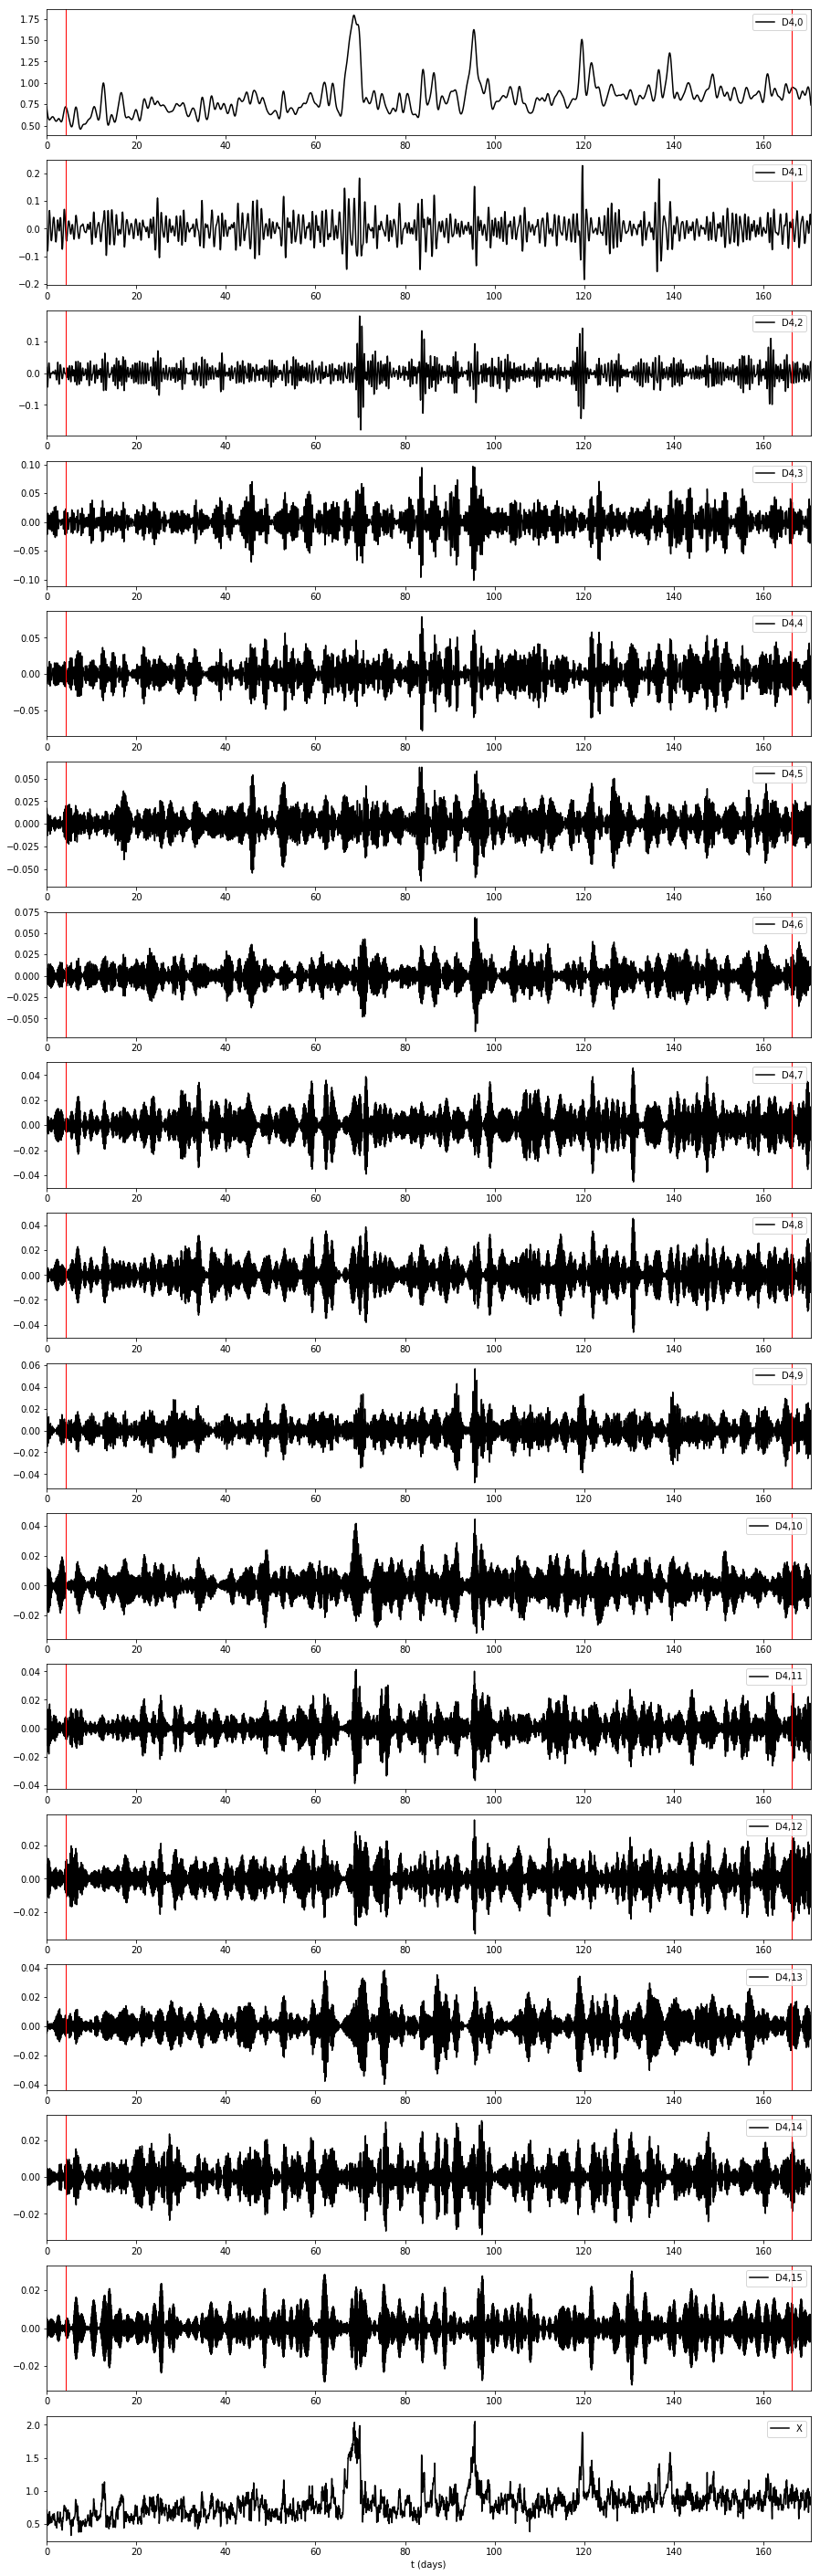

In [6]:
test2()